## Modules

In [1]:
# Parallel Computation
#using Distributed
#addprocs(1);
user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";

In [2]:
# Data Management 
using DataFrames, DataFramesMeta, DrWatson, Queryverse
# Statistics
using StatsBase, Distributions, Random
# Graphs 
using LightGraphs, SimpleWeightedGraphs, GraphIO, GraphPlot
# Modelling
using Agents
# Numerical Computation 
using LinearAlgebra
# Visualization
using Plots, AgentsPlots, PlotThemes, Images, ImageIO
# Custom Module
if user == "PietroMonticone1"
    Epi = include("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "PietroMonticone2"
    Epi = include("/Users/pietromonticone/github/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "DavideOrsenigo"
    Epi = include(raw"C:\Users\Utente\Desktop\Progetti\GitHub\DigitalEpidemiologyProject\Notebooks\Modelling\Julia\MetapopABM\DigitalEpidemiology.jl");
end

Main.DigitalEpidemiology

### Population

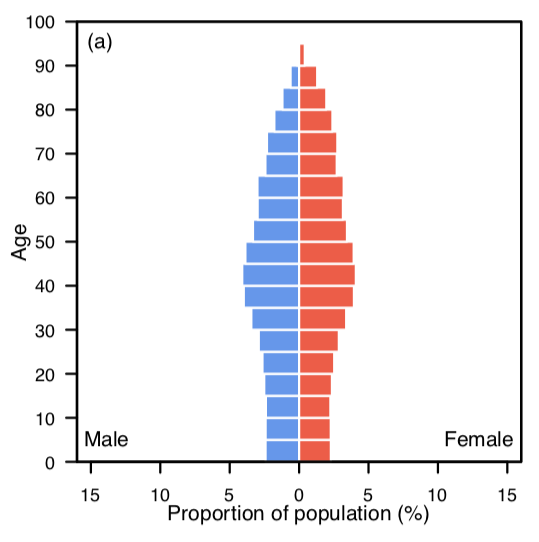

In [11]:
# Load population data
population_data = Epi.LoadData("ProvincialPopulation", user);
# Load age-stratified population data
age_population_data = Epi.LoadData("AgeStratifiedProvincialPopulation", user); 
# Load population pyramid image 
population_pyramid = Epi.LoadImage("PopulationPyramid", user) 

### Contact

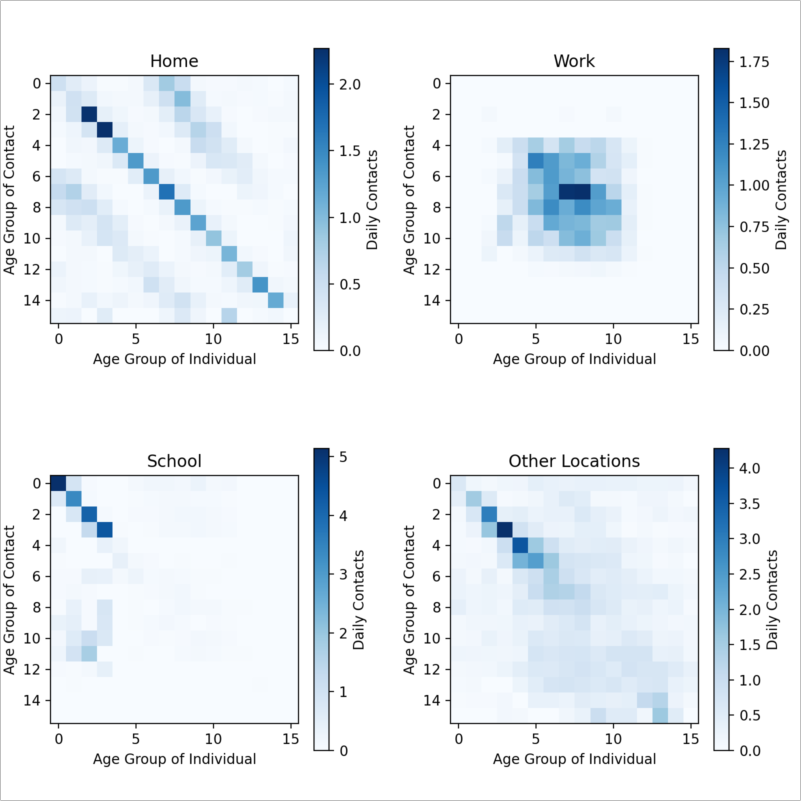

In [12]:
# Load contact data for all locations
all_contact_data=Epi.LoadData("AllEdgeList", user)
# Build contact graph for all locations
all_contact_graph=SimpleWeightedDiGraph(all_contact_data[1].+1, all_contact_data[2].+1, all_contact_data[3]);
# Load contact matrix plot for all locations
all_contact_image=Epi.LoadImage("All", user)

# Load contact data for home
home_contact_data=Epi.LoadData("HomeEdgeList", user)
# Build contact graph for home
home_contact_graph=SimpleWeightedDiGraph(home_contact_data[1].+1, home_contact_data[2].+1, home_contact_data[3]);
# Load contact matrix plot for home
home_contact_image=Epi.LoadImage("Home", user)

# Load contact data for work
work_contact_data=Epi.LoadData("WorkEdgeList", user)
# Build contact graph for work
work_contact_graph=SimpleWeightedDiGraph(work_contact_data[1].+1, work_contact_data[2].+1, work_contact_data[3]);
# Load contact matrix plot for work
work_contact_image=Epi.LoadImage("Work", user)

# Load contact data for school
school_contact_data=Epi.LoadData("SchoolEdgeList", user)
# Build contact graph for school
school_contact_graph=SimpleWeightedDiGraph(school_contact_data[1].+1, school_contact_data[2].+1, school_contact_data[3]);
# Load contact matrix plot for school
school_contact_image=Epi.LoadImage("School", user)

# Load contact data for other locations
other_contact_data=Epi.LoadData("OtherEdgeList", user)
# Build contact graph for other locations
other_contact_graph=SimpleWeightedDiGraph(other_contact_data[1].+1, other_contact_data[2].+1, other_contact_data[3]);
# Load contact matrix plot for other locations
other_contact_image=Epi.LoadImage("Other", user)

[home_contact_image work_contact_image
school_contact_image other_contact_image]
# REVERSE AXES!!

### Mobility

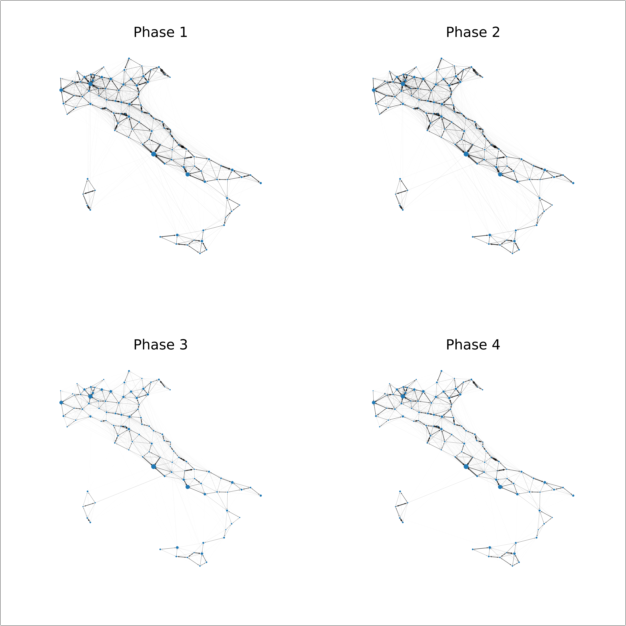

In [13]:
# Load mobility data
mobility_data_phase1 = Epi.LoadData("Flow1", user)
mobility_data_phase2 = Epi.LoadData("Flow2", user)
mobility_data_phase3 = Epi.LoadData("Flow3", user)
mobility_data_phase4 = Epi.LoadData("Flow4", user)
# Build mobility graphs 
mobility_graph_phase1 = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
mobility_graph_phase2 = SimpleWeightedDiGraph(mobility_data_phase2[1], mobility_data_phase2[2], mobility_data_phase2[3])
mobility_graph_phase3 = SimpleWeightedDiGraph(mobility_data_phase3[1], mobility_data_phase3[2], mobility_data_phase3[3])
mobility_graph_phase4 = SimpleWeightedDiGraph(mobility_data_phase4[1], mobility_data_phase4[2], mobility_data_phase4[3])
# Build initial mobility graph
mobility_graph = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
# Remove the 104/5/6/7th node: provincial code doesn't exist
for i in 1:4
    rem_vertex!(mobility_graph_phase1, 104)
    rem_vertex!(mobility_graph_phase2, 104)
    rem_vertex!(mobility_graph_phase3, 104)
    rem_vertex!(mobility_graph_phase4, 104)
    rem_vertex!(mobility_graph, 104)
end
# Load mobility images
mobility_phase1_image = Epi.LoadImage("Phase1", user)	
mobility_phase2_image = Epi.LoadImage("Phase2", user)
mobility_phase3_image = Epi.LoadImage("Phase3", user)
mobility_phase4_image = Epi.LoadImage("Phase4", user)
#Display mobility images
[mobility_phase1_image mobility_phase2_image
mobility_phase3_image mobility_phase4_image]

### Epidemiological

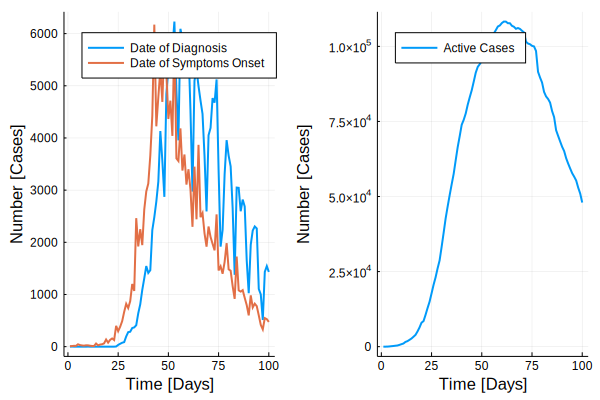

In [14]:
# Load data on confirmed COVID-19 active cases
active_cases=Epi.LoadData("Active", user) 
# Load data on confirmed COVID-19 cases by date of diagnosis and symptoms onset
symptoms_diagnosis_cases=Epi.LoadData("SymptomsDiagnosis", user)
# Load data on COVID-19 tests and tested patients
tests = Epi.LoadData("Tests", user).DailyTestsWeeklyAverage

# Plot time series of confirmed COVID-19 cases by date of diagnosis vs. symptoms onset
plot_cases=plot(1:100,symptoms_diagnosis_cases["Diagnosis"][1:100],
                label="Date of Diagnosis",
                xlab="Time [Days]",
                ylabel="Number [Cases]",
                #title="COVID-19 Confirmed Cases in Italy", 
                legend=:topleft,
                lw=2)
            plot!(plot_cases,1:100,symptoms_diagnosis_cases["Symptoms"][1:100],
                 label="Date of Symptoms Onset",
                 lw=2);
# Plot time series confirmed confirmed COVID-19 active cases 
plot_active=plot(1:100,active_cases["Active Cases"][1:100],
    label="Active Cases",
    xlab="Time [Days]",
    ylabel="Number [Cases]",
    #title="COVID-19 Confirmed Cases in Italy", 
    legend=:topleft,
    lw=2);
# Display time series 
plot(plot_cases, plot_active, layout=2)

## Agent Type

In [3]:
# Patient Definition
mutable struct Patient <: AbstractAgent
    id::Int                     # identity code ∈ ℕ               
    pos::Int                    # location node ∈ ℕ 
    age_group::Int              # age group ∈ [1,16] ⊂ ℕ
    residence::Int              # residence node ∈ ℕ 
    work_pos::Int               # workplace node ∈ ℕ 
    household::Array            # household community
    workplace::Array            # workplace community
    status::Symbol              # infection status ∈ {S,E,I_a,I_p,I_s,H,ICU,R,D}
    diagnosis::Symbol           # ∈ {O,N,P,W,R} 
    status_delay_left::Int      # delay counter for infection status
    diagnosis_delay_left::Int   # delay counter for diagnosis 
    contact_tracing_app::Bool   #
end;

    # prescription::Symbol # ∈ {O, Q, ICU}
    # serological
    # contact-tracing
    # fear, risk aversion -> individual-based social distancing 

## Parameters

In [15]:
# Time 
δt=1
nsteps=230
tf=nsteps*δt
t=0:δt:tf;

In [21]:
# Population
scale_factor=3000
provincial_pops=round.(Int, population_data.population./scale_factor) 
age_provincial_pops=round.(Int, age_population_data./scale_factor) 
N = sum(Array(age_provincial_pops))  # number of agents
M = length(provincial_pops)          # number of provincial subpopulations
K = length(age_provincial_pops[1])   # number of age groups (16)
#R = length(keys(regions))            # number of regional subpopulations

16

In [22]:
# Migration rates
h=0.8 #home

# Initial conditions
I0=1 # round(Int, N/2000)

# Health system
### capacity=round(Int, N*1*10^(-3)); # Total tests in phase 2 and 3 
tests[1:6] = fill(tests[7],6)
capacity_array = round.(Int, vcat(zeros(38), tests./scale_factor))

233-element Array{Int64,1}:
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  ⋮
 24
 25
 26
 27
 28
 28
 29
 29
 29
 30
 30
 30

In [18]:
contact_tracing_graph = SimpleWeightedDiGraph(N)

{18591, 0} directed simple Int64 graph with Float64 weights

In [37]:
function model_step!(model)
    # Initialize geospatial 2-array
    model.geo=[]
    # Increment clock
    model.t+=1
    # Select testing strategy
	### Epi.test!(model,"base_passive_random_uniform_national")
	### Epi.test!(model,"passive_random_uniform_national")
	### Epi.test!(model,"passive_random_uniform_provincial") #ONLY FOR LARGE N
	Epi.test!(model,"passive_biased_symptoms_national")
	### Epi.test!(model,"passive_biased_symptoms_provincial")
    # Select mobility phase
	if model.t≤11 
		Epi.phase1!(model)
	elseif model.t≤11+22
		Epi.phase2!(model)
    elseif model.t>11+22 #model.t≤11+22+65
		Epi.phase3!(model)
    #else
	#	Epi.phase4!(model) #elseif model.t≤11+22+65+28
	end
    # Update geospatial 2-array
    for prov in 1:model.M 
        append!(model.geo, length([agent.id for agent in get_node_agents(prov, model) if agent.status !=:S && agent.status !=:R && agent.status !=:D])) #length([agent.id for agent in get_node_agents(prov, model) if agent.status !=:S && agent.status !=:R && agent.status !=:D])
    end
end;

function agent_step!(agent, model)
    # Remove died patients
	agent.status==:D && return
    
    # Exposure at home
    if length(agent.household)!=0   #&& agent.pos == agent.residence 
        home_contacted_agents=Epi.contact!(agent, model,"home")
        for contacted_agent in home_contacted_agents
            add_edge!(model.contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
        end
        Epi.get_exposed!(agent, model, home_contacted_agents)
    end
    
    # Isolation Condition
    if agent.diagnosis !=:P && agent.diagnosis !=:W
        # Mobility dynamics
        if rand() ≤ (1-2/7) && agent.work_pos != 0
            agent.pos = agent.work_pos
        else
            Epi.migrate!(agent, model)  
        end

        # Exposure at work
        work_contacted_agents=Epi.contact!(agent, model,"work") 
        for contacted_agent in work_contacted_agents
            add_edge!(model.contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
        end
        Epi.get_exposed!(agent, model, work_contacted_agents)    
        # Exposure at school
        if model.phase != 3 
            school_contacted_agents=Epi.contact!(agent, model,"school")
            for contacted_agent in school_contacted_agents
                add_edge!(model.contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
            end
            Epi.get_exposed!(agent, model, school_contacted_agents) 
        end
        # Exposure at other locations
        other_contacted_agents=Epi.contact!(agent, model,"other") 
        for contacted_agent in other_contacted_agents
            add_edge!(model.contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
        end
        Epi.get_exposed!(agent, model, other_contacted_agents) 
    end
    
    # Infection dynamics
	Epi.get_infected!(agent, model) 
    # Symptoms onset
	Epi.get_symptoms!(agent, model)       
    # Recovery dynamics
	Epi.recover_or_die!(agent, model)           
    
    # Mobility dynamics 
	Epi.move_back_home!(agent, model)
    
    # Delays update 
	if agent.status_delay_left>0
		agent.status_delay_left-=1
	end
    if agent.diagnosis_delay_left>0
		agent.diagnosis_delay_left-=1
	end
end;

In [23]:
contact_tracing_graph = SimpleWeightedDiGraph(N)

{18591, 0} directed simple Int64 graph with Float64 weights